# What's Normal? -- Temperature, Gender, and Heart Rate

- We will study with a dataset on body temperature, gender, and heart rate. 
- We'll try to understand the concepts like 
    - true means, 
    - confidence intervals, 
    - t-statistics, 
    - t-tests, 
    - the normal distribution, and 
    - regression.
- Article: http://jse.amstat.org/v4n2/datasets.shoemaker.html
- Body temperature (degrees Fahrenheit)
- Gender (1 = male, 2 = female)
- Heart rate (beats per minute)

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
df = pd.read_csv('http://jse.amstat.org/datasets/normtemp.dat.txt', delim_whitespace=True, names=["temperature", "gender", "heart_rate"])

In [2]:
df

,temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


Recode gender variable, name as "male" and "female"

In [3]:
df["gender"] = df["gender"].replace([1,2],["male", "female"])

In [4]:
df

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73
...,...,...,...
125,99.3,female,68
126,99.4,female,77
127,99.9,female,79
128,100.0,female,78


## 1. Is the *body temperature* population mean  98.6 degrees F?

What is the sample mean?

In [5]:
df["temperature"].mean()

98.24923076923076

What is the sample standard deviation?

In [6]:
df["temperature"].std()

0.7331831580389456

What is the sample standard error of the mean?

In [7]:
df["temperature"].std() / np.sqrt(len(df))

<IPython.core.display.Javascript object>

0.06430441683789102

Plot the distribution of body temperature?

<AxesSubplot:ylabel='Frequency'>

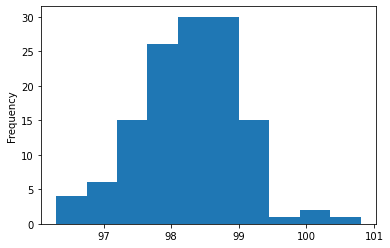

In [8]:
df["temperature"].plot.hist()

<AxesSubplot:ylabel='Density'>

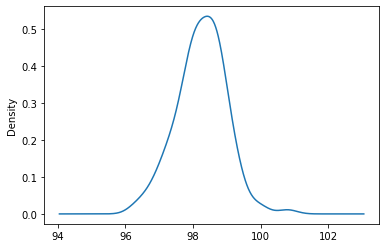

In [9]:
df["temperature"].plot.kde()

<AxesSubplot:>

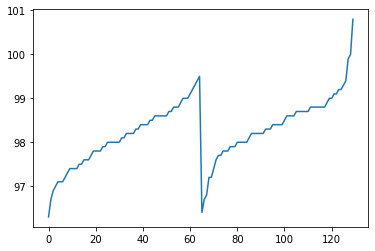

In [10]:
df["temperature"].plot()

Investigate this question by calculating the confidence interval for this sample of 130 subjects. (Use 90%, 95% and 99% CIs)

In [11]:
ci90 = stats.t.interval(0.90, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
ci95 = stats.t.interval(0.95, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())
ci99 = stats.t.interval(0.99, len(df.temperature)-1, loc=df.temperature.mean(), scale=df.temperature.sem())

In [12]:
ci90

(98.14269432413488, 98.35576721432665)

In [13]:
ci95

(98.12200290560803, 98.3764586328535)

In [14]:
ci99

(98.08110824239758, 98.41735329606395)

Investigate this question by using one sample t test.

Check the normality

In [15]:
stats.shapiro(df["temperature"])

ShapiroResult(statistic=0.9865769743919373, pvalue=0.2331680953502655)

In [16]:
stats.kstest(df["temperature"], stats.norm.cdf)

KstestResult(statistic=1.0, pvalue=0.0)

In [17]:
stats.ttest_1samp(df["temperature"], 98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

The sample standard deviation is .73, so the standard error of the mean is .064. Thus the calculated t (using the sample mean of 98.25) is -5.45.

## 2. Is There a Significant Difference Between Males and Females in Normal Temperature?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

Show descriptives for 2 groups

In [18]:
df_f = df["temperature"][df["gender"] == "female"]
df_f.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [19]:
df_m = df["temperature"][df["gender"] == "male"]
df_m.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

Plot the histogram for both groups side-by-side.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

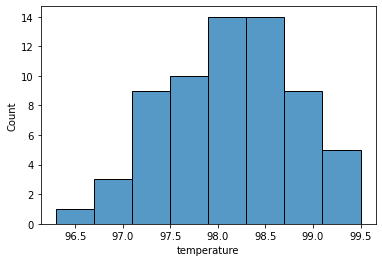

In [20]:
import seaborn as sns
sns.histplot(df_m)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

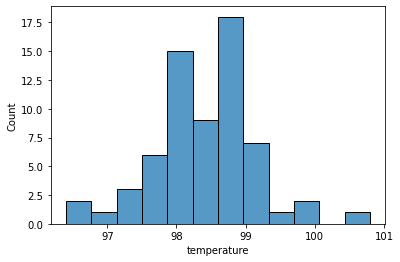

In [21]:
sns.histplot(df_f)

Plot the box plot for both groups side-by-side.

<AxesSubplot:xlabel='gender', ylabel='temperature'>

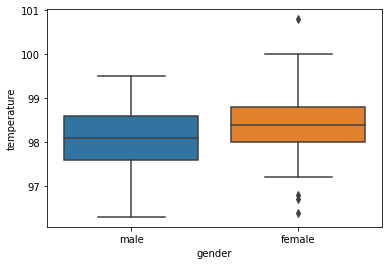

In [22]:
sns.boxplot(x=df["gender"], y=df["temperature"])

Check the normality for male group

In [23]:
stats.shapiro(df["temperature"][df["gender"] == "male"])

ShapiroResult(statistic=0.9894071817398071, pvalue=0.8545167446136475)

Check the normality for female group

In [24]:
stats.shapiro(df["temperature"][df["gender"] == "female"])

ShapiroResult(statistic=0.9679745435714722, pvalue=0.09016574919223785)

Test the assumption of homogeneity of variance
*Hint: Levene’s Test*

The hypotheses for Levene’s test are: 

<i>H<i/><sub>0</sub>: "the population variances of group 1 and 2 are equal"
    
<i>H<i/><sub>1</sub>: "the population variances of group 1 and 2 are not equal"

In [25]:
stats.levene(df_f, df_m, center = "mean")

LeveneResult(statistic=0.061118126945116, pvalue=0.8051334389753846)

Calculate test statistic and p-value.

In [26]:
statistics , p_value = stats.ttest_ind(df_f,df_m)
p_value

0.02393188312240236

In [27]:
for alpha in (0.1,0.05,0.01):
    if p_value < alpha:
        print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
    else:
        print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.1 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.
At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.
At 0.01 level of significance, we fail to reject the null hypothesis.


## 3. Is There a Relationship Between Body Temperature and Heart Rate?

Plot the scatter plot

<AxesSubplot:xlabel='temperature', ylabel='heart_rate'>

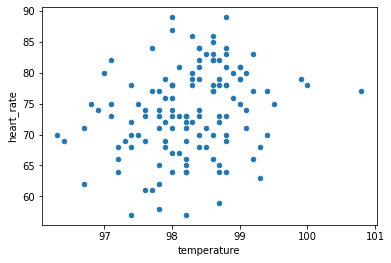

In [28]:
df.plot.scatter("temperature", "heart_rate")

Check the normality for heart rate variable

In [29]:
stats.shapiro(df["heart_rate"])

ShapiroResult(statistic=0.9885448217391968, pvalue=0.35503581166267395)

In [30]:
df["heart_rate"].skew()

-0.17835295992288033

In [31]:
df["heart_rate"].kurtosis()

-0.46302097021643496

Conduct a correllation test, report Pearson’s correlation coefficient and two-tailed p-value.

Two-tailed significance test:

H0: ρ = 0 ("the population correlation coefficient is 0; there is no association")

H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

In [32]:
pearson_r , pearson_p  = stats.pearsonr(df["temperature"], df["heart_rate"])
pearson_r , pearson_p

(0.2536564027207642, 0.003591489250708227)

Find a regression equation to predict heart rate from body temperature.

In [33]:
reg = stats.linregress(df["temperature"], df["heart_rate"])
reg

LinregressResult(slope=2.443238038611885, intercept=-166.2847194182034, rvalue=0.2536564027207643, pvalue=0.003591489250708216, stderr=0.8235190209144222)

Calculate the predicted heart rate of a person at the temperature 97 F.

In [34]:
predict_HR = reg.slope * 97 + reg.intercept
predict_HR # our predict = 70.709

70.70937032714943

In [35]:
df["heart_rate"][df["temperature"] == 97] # actual value = 80

3    80
Name: heart_rate, dtype: int64

In [36]:
reg.rvalue**2 # R-squared = corr ** 2 

0.06434157064123855

How much of the variation of the heart_rate variable is explained by the temperature variable? *Coefficient of determination (R-squared):*

# Spring 2014 Semester Survey

In [37]:
#change the link
survey = pd.read_csv('university_survey_2014.csv')
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


Know your data

In [38]:
survey["Math"] = pd.to_numeric(survey["Math"],errors='coerce')
survey["English"] = pd.to_numeric(survey["English"],errors='coerce')
survey["Reading"] = pd.to_numeric(survey["Reading"],errors='coerce')
survey["Writing"] = pd.to_numeric(survey["Writing"],errors='coerce')
survey.describe()[["English", "Math"]]

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


## Paired Samples t Test

The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the **English** and **Math** sections, and want to determine whether students tended to score higher on their English or Math test, on average. 

Show descriptives for 2 sections

In [39]:
survey.describe()[["English", "Math"]]

,English,Math
count,409.000000,422.000000
mean,82.787555,65.468009
std,6.839803,8.375930
min,59.830000,35.320000
25%,78.330000,60.202500
50%,83.150000,65.445000
75%,87.170000,70.567500
max,101.950000,93.780000


In [40]:
pairset = survey [["English", "Math"]].dropna()

In [41]:
pairset.describe()

,English,Math
count,398.000000,398.000000
mean,82.744095,65.446834
std,6.844801,8.462137
min,59.830000,35.320000
25%,78.225000,60.202500
50%,83.145000,65.495000
75%,87.165000,70.522500
max,101.950000,93.780000


Plot the histogram for both groups side-by-side.

<AxesSubplot:>

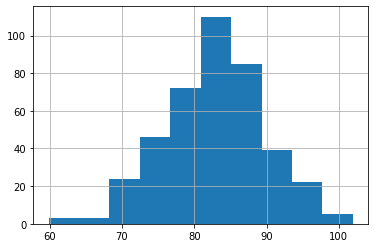

In [42]:
survey["English"].hist()

<AxesSubplot:>

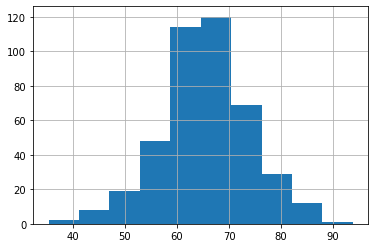

In [43]:
survey["Math"].hist()

Plot the box plot for both variables side-by-side.

<AxesSubplot:>

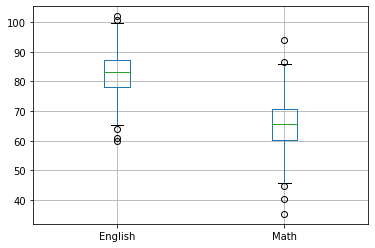

In [44]:
pairset.boxplot()

Run dependent t test

In [45]:
stats.ttest_rel(pairset["English"], pairset["Math"]) # p_value < 0 reject to Null hypothesis

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

In [46]:
# There is a huge different between English and Math scores.

Compute pairwise correlation of sections (English, Reading, Math, and Writing), excluding NA/null values.

In [47]:
sections = ["Math", "English", "Reading", "Writing"]
sectionsset = survey[sections].dropna()
sectionsset

,Math,English,Reading,Writing
0,60.02,88.24,81.50,81.44
1,70.19,89.45,85.25,73.27
2,71.20,96.73,86.88,84.24
3,55.89,74.06,88.68,73.16
4,65.52,82.61,77.30,80.45
...,...,...,...,...
429,66.33,83.53,80.02,84.21
431,70.25,91.01,86.87,82.67
432,58.16,81.05,85.76,81.87
433,66.84,75.59,85.97,79.35


In [48]:
sectionsset.corr(method = "pearson")

,Math,English,Reading,Writing
Math,1.000000,0.248545,0.518579,0.110113
English,0.248545,1.000000,0.338691,0.375107
Reading,0.518579,0.338691,1.000000,0.131742
Writing,0.110113,0.375107,0.131742,1.000000


# One-way ANOVA

In the sample dataset, the variable Sprint is the respondent's time (in seconds) to sprint a given distance, and Smoking is an indicator about whether or not the respondent smokes (0 = Nonsmoker, 1 = Past smoker, 2 = Current smoker). Let's use ANOVA to test if there is a statistically significant difference in sprint time with respect to smoking status. Sprint time will serve as the dependent variable, and smoking status will act as the independent variable.

The null and alternative hypotheses of one-way ANOVA can be expressed as:

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

Data Manipulation and Recoding

In [49]:
survey["Sprint"] = pd.to_numeric(survey["Sprint"],errors='coerce')
survey["Smoking"] = pd.to_numeric(survey["Smoking"],errors='coerce')

In [50]:
oneWaySet = survey[["Sprint", "Smoking"]].dropna()
oneWaySet

,Sprint,Smoking
0,7.978,0.0
1,8.004,0.0
5,4.650,0.0
6,4.750,0.0
8,6.279,0.0
...,...,...
428,7.819,0.0
429,7.036,0.0
431,9.125,0.0
433,6.905,2.0


In [51]:
oneWaySet["Smoking"] = oneWaySet["Smoking"].replace([0.0,1.0,2.0], ["NonSmoker", "CurrentSmoker", "PastSmoker"])
oneWaySet

,Sprint,Smoking
0,7.978,NonSmoker
1,8.004,NonSmoker
5,4.650,NonSmoker
6,4.750,NonSmoker
8,6.279,NonSmoker
...,...,...
428,7.819,NonSmoker
429,7.036,NonSmoker
431,9.125,NonSmoker
433,6.905,PastSmoker


In [52]:
oneWaySet.groupby("Smoking").describe()["Sprint"]

,count,mean,std,min,25%,50%,75%,max
Smoking,,,,,,,,
CurrentSmoker,33.0,6.835333,1.024415,4.889,6.0750,6.876,7.706,8.549
NonSmoker,261.0,6.411487,1.251783,4.503,5.3600,6.326,7.337,9.597
PastSmoker,59.0,7.120915,1.083500,5.295,6.2925,7.013,7.983,9.475


Check normality assumption for each group

In [53]:
stats.shapiro(oneWaySet["Sprint"][oneWaySet["Smoking"] == "NonSmoker"])

ShapiroResult(statistic=0.9603647589683533, pvalue=1.3843732631357852e-06)

In [54]:
stats.shapiro(oneWaySet["Sprint"][oneWaySet["Smoking"] == "CurrentSmoker"])

ShapiroResult(statistic=0.9684571027755737, pvalue=0.4388125240802765)

In [55]:
stats.shapiro(oneWaySet["Sprint"][oneWaySet["Smoking"] == "PastSmoker"])

ShapiroResult(statistic=0.9690086245536804, pvalue=0.13695794343948364)

Run One-way ANOVA

In [56]:
nonsmoker = oneWaySet[oneWaySet["Smoking"] == "NonSmoker"]["Sprint"]
currentsmoker = oneWaySet[oneWaySet["Smoking"] == "CurrentSmoker"]["Sprint"]
pastsmoker = oneWaySet[oneWaySet["Smoking"] == "PastSmoker"]["Sprint"]

In [57]:
stats.f_oneway(nonsmoker,currentsmoker,pastsmoker)

F_onewayResult(statistic=9.208599845380922, pvalue=0.00012659768158159465)